# Preprocess CLI

In [34]:
import pandas as pd

# read CLI data
df = pd.read_csv('../data/OECD_CLI_Countries.csv')
# drop 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'
df = df.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

df.TIME 

0        1957-12
1        1958-01
2        1958-02
3        1958-03
4        1958-04
          ...   
11358    2022-10
11359    2022-11
11360    2022-12
11361    2023-01
11362    2023-02
Name: TIME, Length: 11363, dtype: object

In [40]:

# 选取时间范围为16年以后的数据
df.TIME = pd.to_datetime(df.TIME, format='%Y-%m')
df = df[df.TIME >= '2016-01']
print(df.columns)
df.head()

Index(['LOCATION', 'TIME', 'Value'], dtype='object')


,LOCATION,TIME,Value
697,GBR,2016-01-01,100.07180
698,GBR,2016-02-01,99.94090
699,GBR,2016-03-01,99.84997
700,GBR,2016-04-01,99.79050
701,GBR,2016-05-01,99.76693


In [44]:
# 将数据拼接为wide格式
df_wide = df.pivot(index='TIME', columns='LOCATION', values='Value')
df_wide.tail(10)

LOCATION,AUS,BRA,CAN,CHN,DEU,ESP,FRA,G-20,G-7,GBR,IDN,IND,ITA,JPN,KOR,MEX,TUR,USA,ZAF
TIME,,,,,,,,,,,,,,,,,,,
2022-05-01,99.70708,100.03380,100.19950,99.07037,100.39690,99.68612,99.44949,99.69798,99.70137,97.17896,98.64719,100.39620,99.35635,100.57670,99.86686,101.65540,100.45350,99.73771,100.8306
2022-06-01,99.57896,99.92672,99.59220,98.96525,99.94330,99.10941,99.12185,99.46622,99.34699,96.48176,98.54940,100.29940,98.67097,100.55020,99.63421,101.27100,100.20120,99.43115,100.7320
2022-07-01,99.44211,99.82699,99.00371,98.87343,99.47900,98.65838,98.85508,99.25397,99.03151,95.91102,98.38701,100.19520,98.06152,100.50250,99.42101,100.86800,99.99297,99.17003,100.6454
2022-08-01,99.30014,99.73755,98.47977,98.79945,99.05780,98.37045,98.63995,99.07155,98.76923,95.44447,98.17039,100.08510,97.56720,100.43770,99.22623,100.49160,99.85497,98.96595,100.5677
2022-09-01,99.13543,99.61385,98.04028,98.73969,98.72105,98.21620,98.45224,98.91483,98.55559,95.10899,97.91634,99.97250,97.19353,100.34210,99.03510,100.19960,99.73895,98.80187,100.4961
2022-10-01,98.96883,99.43156,97.69227,98.69417,98.49790,98.15638,98.29595,98.78665,98.39675,94.95733,97.66795,99.86057,96.96892,100.23000,98.83929,99.98000,99.61476,98.66790,100.4363
2022-11-01,98.82573,99.19315,97.42619,98.66842,98.39787,98.15200,98.15207,98.69038,98.28995,94.95185,97.45609,99.75053,96.89365,100.10260,98.64122,99.83887,99.52110,98.56544,100.3929
2022-12-01,98.71902,98.94151,97.22161,98.64542,98.39911,98.17680,97.99821,98.62013,98.22768,95.00900,97.29505,99.64233,96.91621,99.98064,98.45143,99.76495,99.46009,98.50278,100.3551
2023-01-01,98.64274,98.70345,97.06342,98.61620,98.46326,98.21847,97.84220,98.56670,98.19500,95.07706,97.19128,99.53709,96.98766,99.87267,98.27413,99.72890,99.41035,98.47016,100.3403


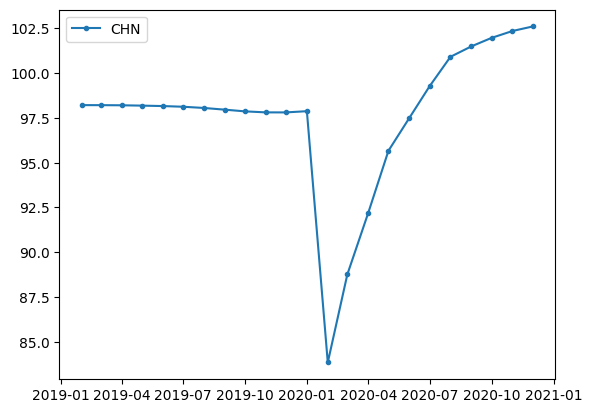

In [62]:
# 可视化CHN的CLI数据，区间为2019-2021
import matplotlib.pyplot as plt
# to datetime
df_wide.date = pd.to_datetime(df_wide.index, format='%Y-%m')
time =  (df_wide.date > '2019-01') & (df_wide.date < '2021-01')
# 样式为*
plt.plot(df_wide.date[time],df_wide.CHN[time], label='CHN', marker='.')
plt.legend()
plt.show()

In [52]:
df_wide.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
      